<a href="https://colab.research.google.com/github/harshaanth/DS-Linear-Regression-Project-Boston-House-Price-Prediction/blob/main/Boston_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Project: Boston House Price Prediction


## Problem Statement
---------------------------

The problem on hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

----------------------------
## Data Information
---------------------------

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- **CRIM:**     per capita crime rate by town
- **ZN:**       proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:**    proportion of non-retail business acres per town
- **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:**      nitric oxides concentration (parts per 10 million)
- **RM:**       average number of rooms per dwelling
- **AGE:**     proportion of owner-occupied units built prior to 1940
- **DIS:**      weighted distances to five Boston employment centres
- **RAD:**      index of accessibility to radial highways
- **TAX:**      full-value property-tax rate per 10,000 dollars
- **PTRATIO:**  pupil-teacher ratio by town
- **LSTAT:**    %lower status of the population
- **MEDV:**     Median value of owner-occupied homes in 1000 dollars.

--------------------------------------------

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [ ]:
import requests
import pandas as pd
from io import StringIO

orig_url="https://drive.google.com/file/d/1bdiFLHsWMWAsHfbPupyf_d5uA4xObYQu/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


* The price of the house indicated by the variable MEDV is the target variable and the rest are the independent variables based on which we will predict house price.

### Get information about the dataset using the info() method

In [ ]:
df.info() #name of dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


* There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.

* Every column in this dataset is numeric in nature.

---------------------------
## Let's now check the summary statistics of this dataset
---------------------------

### Write the code to find the summary statistics and write your observations based on that.

In [ ]:
#write your code here
df.describe().T # .T transposes the rows and columns

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:**

Half of the regions have per-capita crime rates between 0.08204 and 3.677082.
   
The majority of regions do not contain any residential land zoned for lots over 12,500 sq. ft. while in a few regions, 100% of the residential land is zoned for lots over 12,500 sq. ft.
  
Fifty percent of regions have between 5.2% and 18.1% of non-retail business acres per town.  

A statistical summary of the CHAS variable doesn't make sense because this is a category. The distribution will be explored in the data visualization section.
  
Fifty percent of regions have nitric oxide concentrations between 0.449000 and 0.624000 PPM.
  
Fifty percent of regions have an average of 5.9 to 6.6 romms in a dwelling.
  
In fifty percent of regions, between 45% and	94% of owner-occupied units were built prior to 1940.
   
Fifty percent of regions are between 2.10	and	5.19 units of weighted distance to five Boston employment centers.
   
RAD is a categorical variable therefore statistical summarys are not meaningful. This variable is explored in the data visualizations.
   
In fifty percent of regions the full-value property-tax rate per 10,000 dollars is between 279.00 and 666.00.
   
In fifty percent of regions, the pupil-teacher ratio is between 17.4 and 20.2.

The distribution of proportion of lower income population is very spread out. A typical region has about 11.3% lower status. In fifty percent of regions, the percent of the population who are lower status is between	about 7.0% and 17.0%. The region with the least lower status population has 1.7% and the region with the most has nearly 38.0%.
  
Median value of owner-occupied homes in 1000 dollars is the target variable for this analysis. The median home value ranges between `$5,000` and `$50,000` with half of the values concentrated between `$17,000` and `$25,000`. A typical region has a home value of `$21,2000`.


Before performing the modeling, it is important to check the univariate distribution of the variables.

---------------------------
## Univariate Analysis
---------------------------

### Check the distribution of the variables

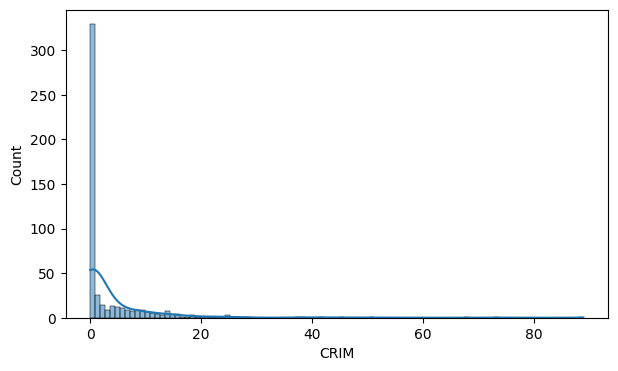

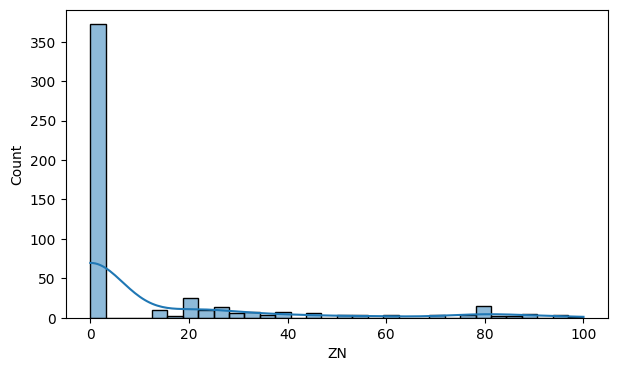

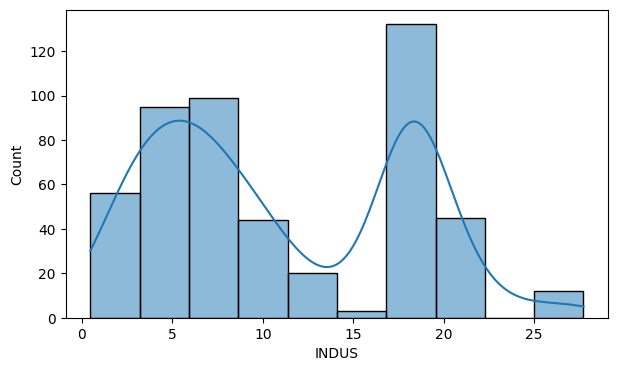

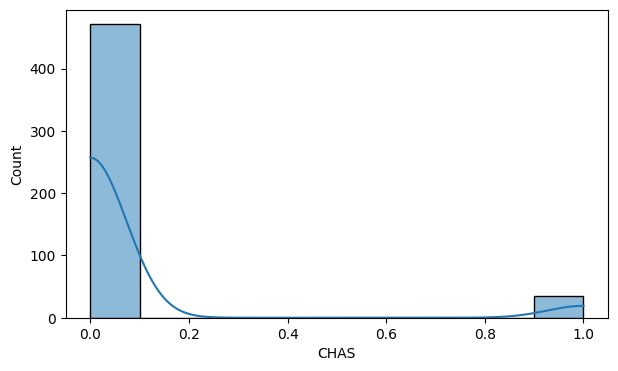

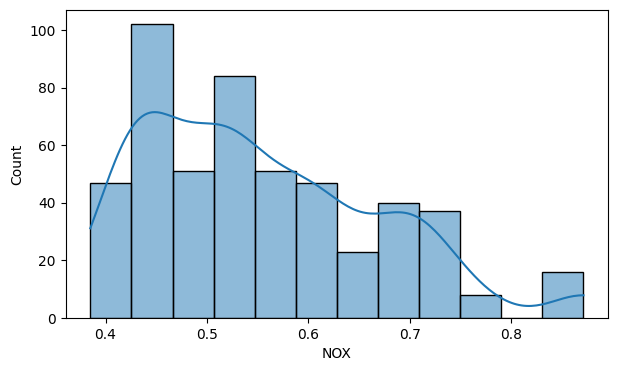

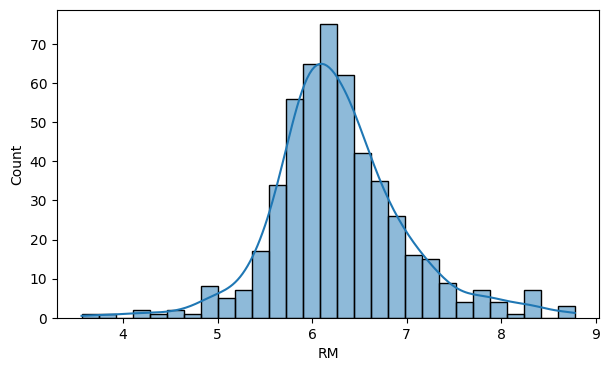

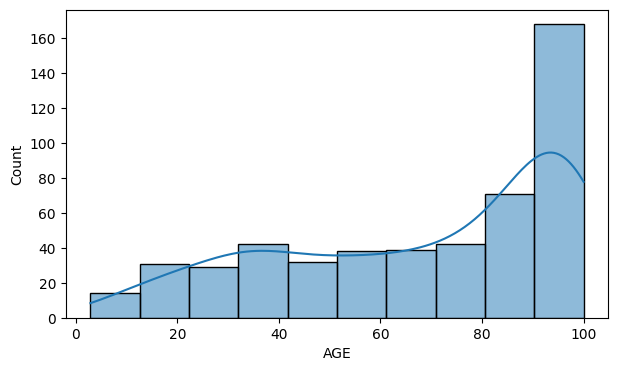

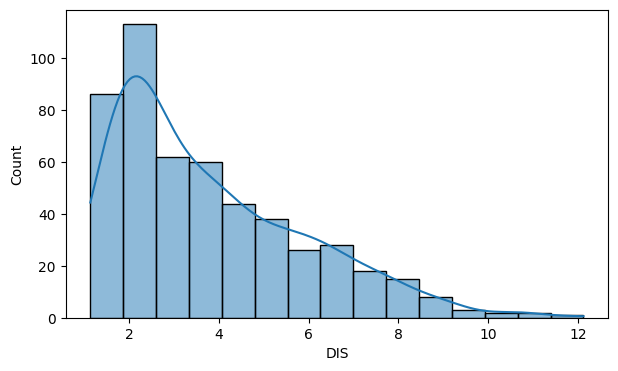

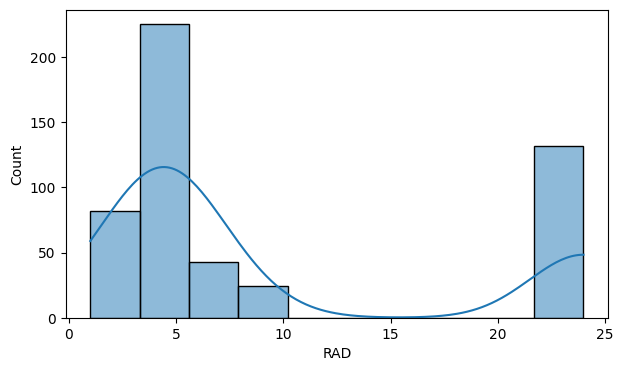

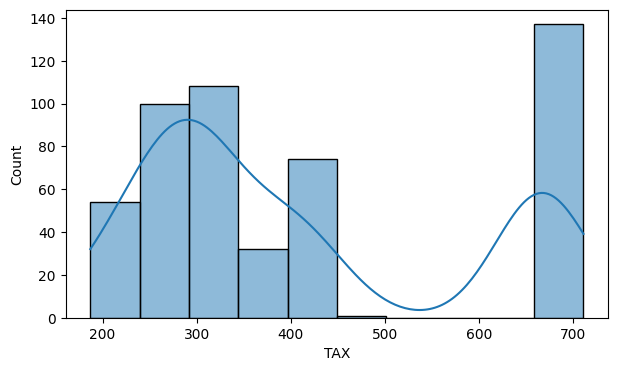

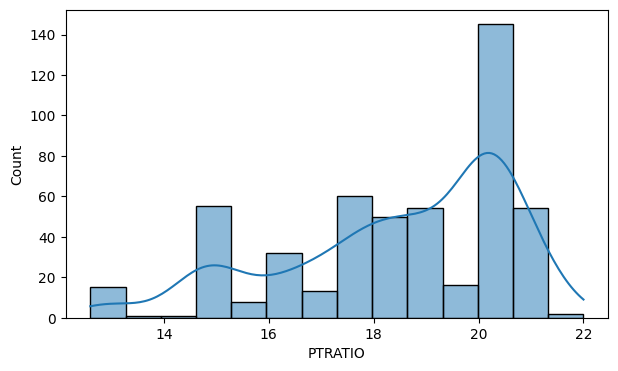

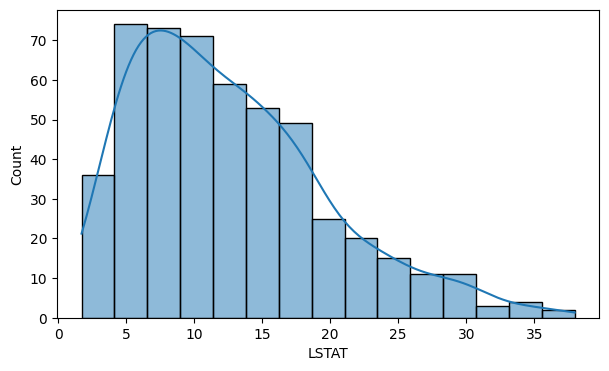

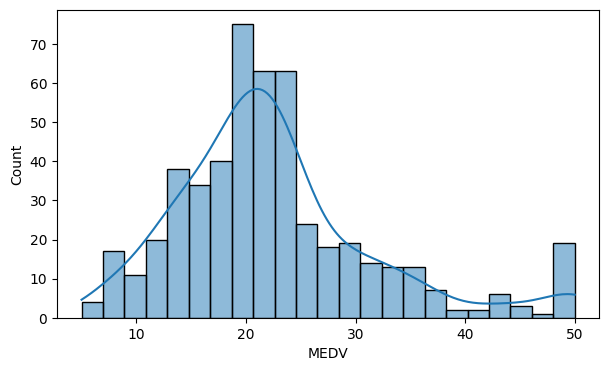

In [ ]:
# let's plot all the columns to look at their distributions
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde = True)
    plt.show()

* **The variables CRIM and ZN are positively skewed.** This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.
* **The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution**, and the majority of the houses are away from Charles river (CHAS = 0).
* The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940.
* **The variable DIS** (average distances to five Boston employment centers) **has a nearly exponential distribution**, which indicates that most of the houses are closer to these employment centers.
* **The variables TAX and RAD have a bimodal distribution.**, indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.  
* The dependent variable MEDV seems to be slightly right skewed.

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [ ]:
df['MEDV_log'] = np.log(df['MEDV'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

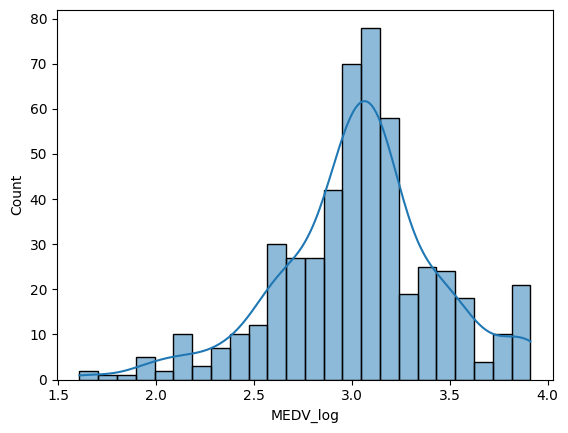

In [ ]:
sns.histplot(data=df, x='MEDV_log', kde = True)

The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceeed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

---------------------------
## Bivariate Analysis
---------------------------

#### Let's check the correlation using the heatmap

- **Write the code to plot the correlation heatmap between the variables**
- **Write your observations**

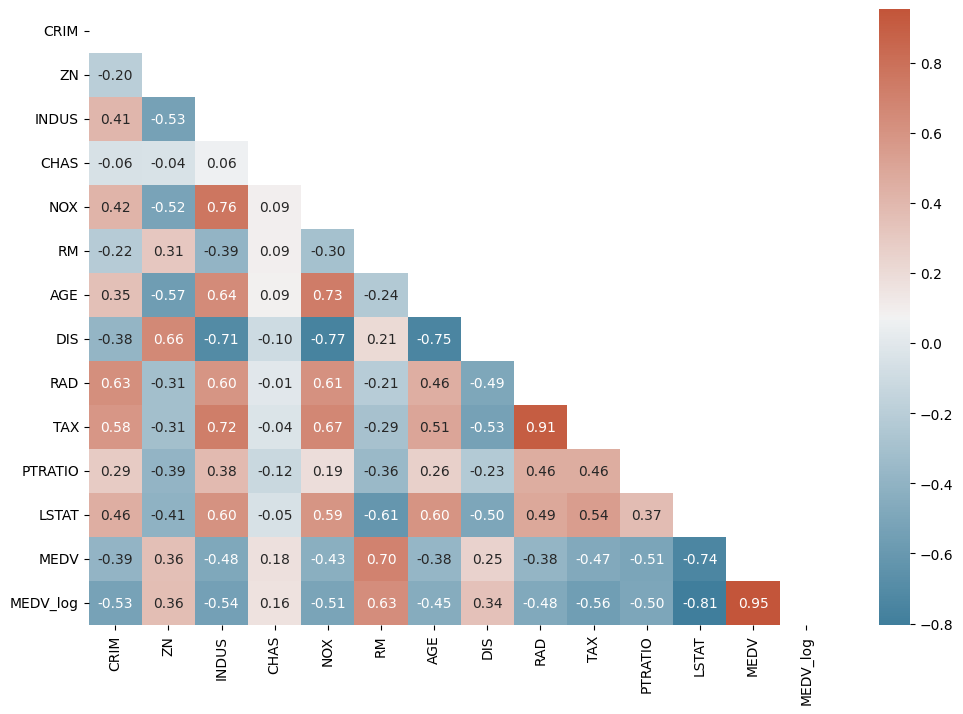

In [ ]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr=df.corr()
trimask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap, mask=trimask) #write your code here
plt.show()

**Observations:**  
Positive correlations of note are observed between:

INDUS and NOX  
INDUS and TAX  
AGE and NOX  
RAD and TAX  
RM and MEDV  

Negative correlations of note are observed between:

INDUS and DIS  
NOX and DIS  
AGE and DIS  
MEDV and LSTA  T




Now, we will visualize the relationship between the pairs of features having significant correlations.

### Visualizing the relationship between the features having significant correlations (> 0.7)

- **Create a scatter plot to visualize the relationship between the features having significant correlations (>0.7)**
- **Write your observations from the plots**

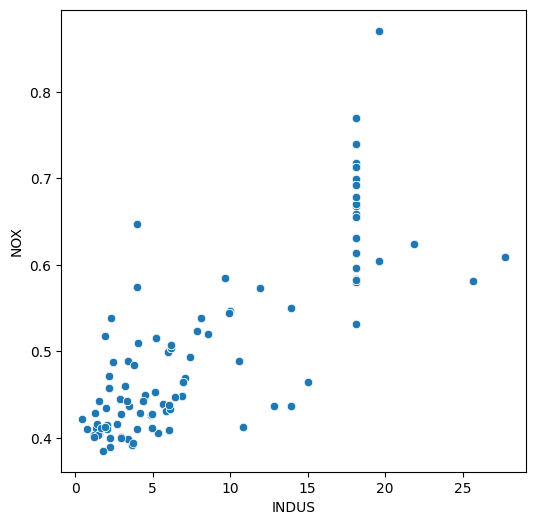

In [ ]:
# scatterplot to visualize the relationship between NOX and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='INDUS', y='NOX') #write you code here
plt.show()

**Observations:**
There is a clear positive association between INDUS and NOX. There are several observations such that the proportion of non-business acres is about 18%. Perhaps there are some zoning restrictions responsible for this pattern.

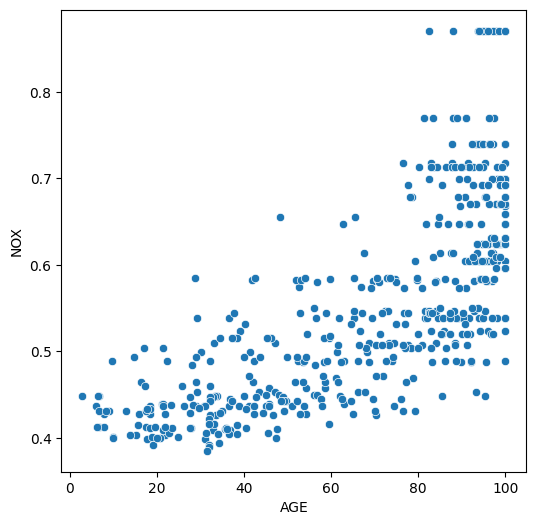

In [ ]:
# scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='AGE', y='NOX') #Write your code here
plt.show()

**Observations:**  
There is a positive association between AGE and NOX. There appears to be increasing variability in the NOX measurements as AGE increases.

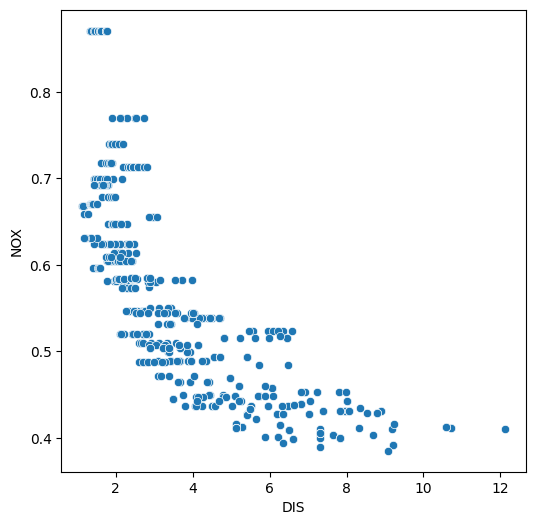

In [ ]:
# scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='DIS', y='NOX') #Write your code here
plt.show()

**Observations:**  
The relationship between NOX and DIS is strong and also non-linear showing a concave downward trend. As DIS increases the NOX decreases to what appears to be a lower threshold of about 0.4 PPM. Perhaps it is difficult to measure concentrations below this threshold.

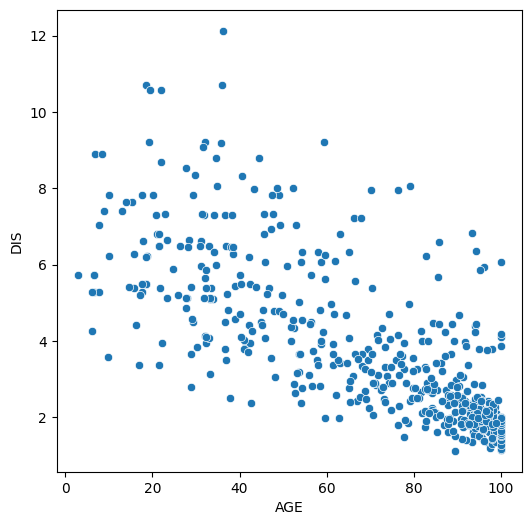

In [ ]:
# scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'DIS', data = df)
plt.show()

* The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

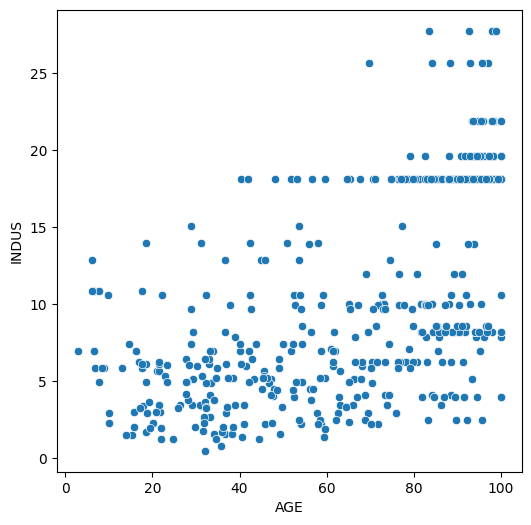

In [ ]:
# scatterplot to visualize the relationship between AGE and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'INDUS', data = df)
plt.show()

* No trend between the two variables is visible in the above plot.

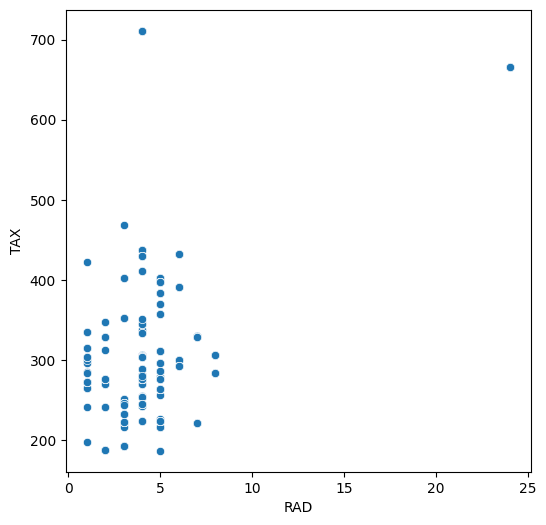

In [ ]:
# scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)
plt.show()

The correlation between RAD and TAX is very high. But, no trend is visible between the two variables.
This might be due to outliers.

Let's check the correlation after removing the outliers.

In [ ]:
# remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


So the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

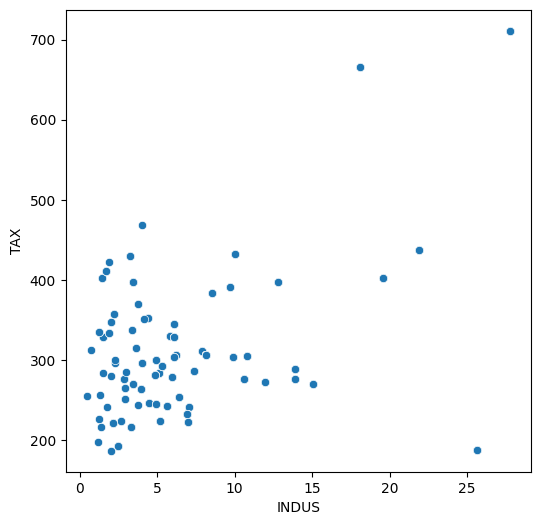

In [ ]:
# scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)
plt.show()

* The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

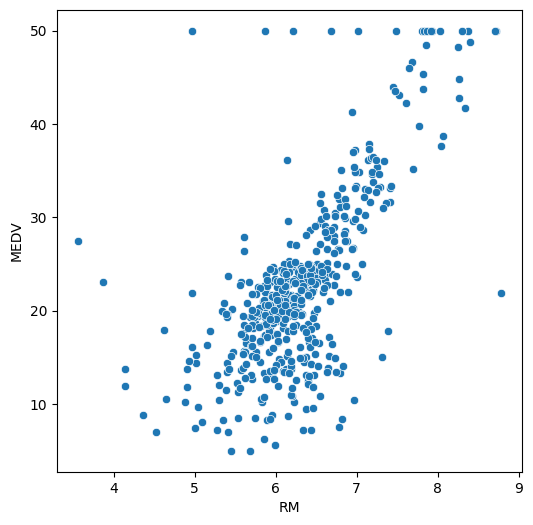

In [ ]:
# scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RM', y = 'MEDV', data = df)
plt.show()

* The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

* There are a few outliers in a horizotal line as the MEDV value seems to be capped at 50.

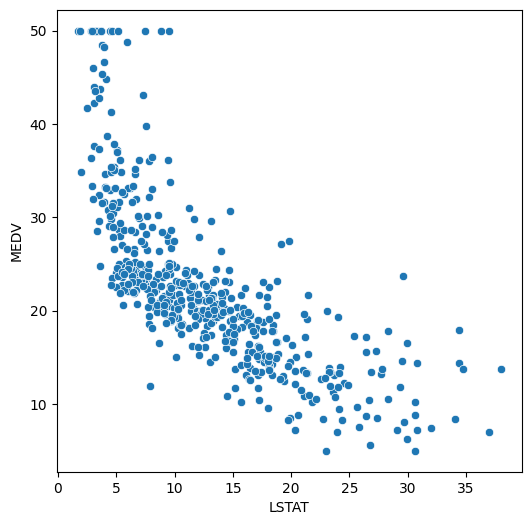

In [ ]:
# scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)
plt.show()

* The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.

* There are few outliers and the data seems to be capped at 50.

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among a few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### Split the dataset
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [ ]:
# separate the dependent and indepedent variable
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log'})

# add the intercept term
X = sm.add_constant(X)

In [ ]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

Next, we will check the multicollinearity in the train dataset.

### Check for Multicollinearity

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


* There are two variables with a high VIF - RAD and TAX. Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

**Drop the column 'TAX' from the training data and check if multicollinearity is removed?**

In [ ]:
# create the model after dropping TAX
X_train = X_train.drop(columns='TAX') #Write your code here

# check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

**Write the code to create the linear regression model using statsmodels OLS and print the model summary. Write your observations from the model.**

In [ ]:
# create the model
model1 = sm.OLS(y_train,X_train).fit() #write your code here

# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Thu, 28 Mar 2024   Prob (F-statistic):          1.40e-101
Time:                        12:29:41   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations:**  
The F-statistic is well beyond the critical range and suggests that the model is statistically significant.

The R-squared and the adjusted R-squared values indicate that the model explains nearly 80% of the variation in home value.

All predictor variables except for ZN, AGE, and INDUS are statistically significant.

**Drop insignificant variables from the above model and create the regression model again.**

### Examining the significance of the model

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero.

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [ ]:
# create the model after dropping TAX
Y = df['MEDV_log']
X = df.drop(columns={'ZN','AGE','INDUS','MEDV','MEDV_log'}) #write your code here
X = sm.add_constant(X)

#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

# create the model
model2 = sm.OLS(y_train,X_train).fit() #write your code here
# get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     128.0
Date:                Thu, 28 Mar 2024   Prob (F-statistic):          3.86e-104
Time:                        12:29:41   Log-Likelihood:                 77.683
No. Observations:                 354   AIC:                            -135.4
Df Residuals:                     344   BIC:                            -96.67
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6791      0.241     19.423      0.000       4.205       5.153
CRIM          -0.0125      0.002     -7.402      0.000      -0.016      -0.009
CHAS           0.1085      0.039      2.789      0.006       0.032       0.185
NOX           -0.9709      0.172     -5.646      0.000      -1.309      -0.633
RM             0.0576      0.020      2.876      0.004       0.018       0.097
DIS           -0.0444      0.008     -5.632      0.000      -0.060      -0.029
RAD            0.0132      0.003      4.041      0.000       0.007       0.020
TAX           -0.0004      0.000     -2.073      0.039      -0.001   -1.81e-05
PTRATIO       -0.0472      0.006     -7.611      0.000      -0.059      -0.035
LSTAT         -0.0291      0.002    -12.933      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       35.829   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.120
Skew:                           0.480   Prob(JB):                     1.64e-20
Kurtosis:                       5.293   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* We can see that the **R-squared value has decreased by 0.002**, since we have removed variables from the model, whereas the **adjusted R-squared value has increased by 0.001**, since we removed statistically insignificant variables only.

Now, we will check the linear regression assumptions.

### Check the below linear regression assumptions

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

**Write the code to check the above linear regression assumptions and provide insights.**

#### Check for mean residuals

In [ ]:
residuals = model2.resid

# Write your code here
residuals.mean()

1.8169395680405034e-14

**Observations:**  
The mean of the residuals is approximately 0.

#### Check for homoscedasticity



* Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

* Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

* We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

In [ ]:
df=df.dropna(axis=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  LSTAT     506 non-null    float64
 12  MEDV      506 non-null    float64
 13  MEDV_log  506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [ ]:
##import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 1.064805015559773), ('p-value', 0.34270801062715983)]

**Observations:**  
The p-value is larger than 0.05 therefore we fail to reject the premise that the resduals are homoskedastic and conclude that there is not heteroskedasitcity present in the residuals. This means we can assume that the residuals have a constant variance. This satisfies the linear assumption of constant variance of residual terms.

#### Linearity of variables

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

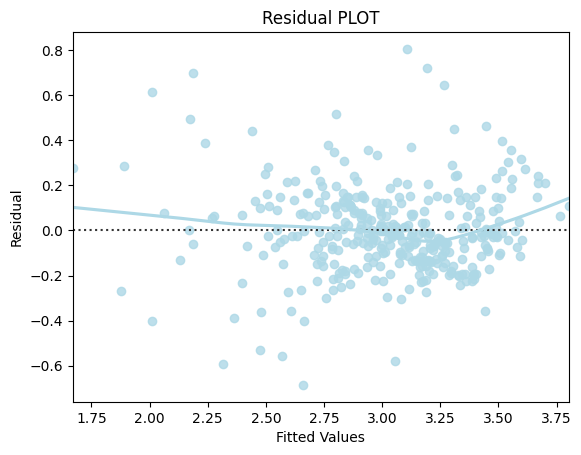

In [ ]:
# predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color="lightblue", lowess=True) #write your code here
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

**Observations:**  
The residual plot suggests that the residuals are not random as there is a pattern of average fitted values being associated with a tendency of the model to overpredict while small and large fitted values are associated with a tendency of the model to underpredict.

#### Normality of error terms
The residuals should be normally distributed.

<Axes: ylabel='Count'>

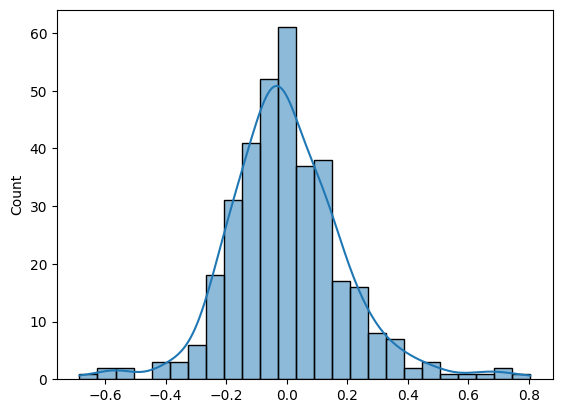

In [ ]:
# Plot histogram of residuals
#write your code here
sns.histplot(residuals, kde=True)

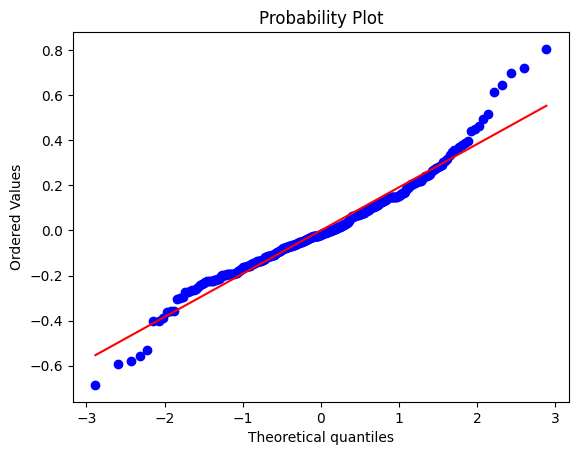

In [ ]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

**Observations:**  
The histogram and the normal probability plot show some evidence that the residuals are right skewed.

### Check the performance of the model on the train and test data set

**Write your observations by comparing model performance of train and test dataset.**

In [ ]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)

    Data      RMSE       MAE      MAPE
0  Train  0.194294  0.142478  4.939886
1   Test  0.191576  0.146486  5.095276


**Observations:**  
The Root Mean Squared Error is an aggregate measure of typical prediction error. The training data has a slightly larger RMSE than the test data which suggest minor over-fitting but not of great concern.

#### Apply cross validation to improve the model and evaluate it using different evaluation metrics

**Apply the cross validation technique to improve the model and evaluate it using different evaluation metrics.**

In [ ]:
# import the required function

from sklearn.model_selection import cross_val_score

# build the regression model and
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10) #write your code here
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error') #write your code here

print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.731 (+/- 0.233)
Mean Squared Error: 0.041 (+/- 0.023)


- The R-squared on the cross validation is 0.729, whereas on the training dataset it was 0.769
- And the MSE on cross validation is 0.041, whereas on the training dataset it was 0.038

We may want to reiterate the model building process again with new features or better feature engineering to increase the R-squared and decrease the MSE on cross validation.

### Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. Write the regression equation.

**Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. Write the regression equation.**

In [ ]:
coef = model2.params #write your code here
out=pd.DataFrame(coef, columns=['Coefficients'])
out

,Coefficients
const,4.679110
CRIM,-0.012533
CHAS,0.108545
NOX,-0.970924
RM,0.057630
DIS,-0.044432
RAD,0.013166
TAX,-0.000354
PTRATIO,-0.047167
LSTAT,-0.029118


In [ ]:
# Let us write the equation of the fit
Equation = "log (Price) ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) =	( 4.679109669823687 ) *  const + ( -0.012532760598489933 ) *  CRIM + ( 0.10854543975614607 ) *  CHAS + ( -0.9709235170638023 ) *  NOX + ( 0.0576297911291612 ) *  RM + ( -0.04443174664126226 ) *  DIS + ( 0.013166395115408035 ) *  RAD + ( -0.0003541082986386471 ) *  TAX + ( -0.0471667112237932 ) *  PTRATIO + ( -0.029118375637998784 ) *  LSTAT + 

### Back-transforming coefficients from log scale
[See reference](https://library.virginia.edu/data/articles/interpreting-log-transformations-in-a-linear-model)

When the target variable is transormed to a log scale, the coefficients may be exponetiated to more interpretable values.

The results are then interpreted as the factor by which the target variable changes for each unit increase in the feature variable. Subtracting 1 from this value and multiplying by 100% yields the percent change in the target variable for each unit increase in the feature variable.

In [ ]:
coef = model2.params #write your code here
out_p=pd.DataFrame((np.exp(coef)-1)*100, columns=['Coefficients'])
out_p

,Coefficients
const,10667.416433
CRIM,-1.245455
CHAS,11.465556
NOX,-62.126689
RM,5.932275
DIS,-4.345912
RAD,1.325345
TAX,-0.035405
PTRATIO,-4.607165
LSTAT,-2.869852


### Interpretations
`CRIM	-1.2455` For each unit increase in the per capita crime rate, the model predicts a 1.2% decrease in the median home value.

`RM	5.932275` For each unit increase in the average number of rooms per dwelling, the model predicts a 5.9% increase in the median home value.



**Write the conclusions and business recommendations derived from the model.**

Conclusions:

In regions with higher crime rates, higher highway accessibility, higher full-value property tax-rate, and a larger percentage of the population characterized as lower status the **median home value is expected to be lower**.
   
**Median home value is higher when** the region has relatively more homes that border the Charles River, higher nitrous oxide concentration, more rooms on average, is farther from Boston employment centers, and has a higher pupil-teacher ratio.

Recommendations:

The model can be used to predict median home values relatively well using measurements for the features included in this analysis.